# RISCA

In [15]:
%pwd
%pip install numpy matplotlib seaborn pandas ipywidgets openpyxl

  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.3 MB 1.3 MB/s eta 0:00:02
   ----------------- ---------------------- 1.0/2.3 MB 1.9 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.3 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Dependencies

In [16]:
# %pip install numpy matplotlib seaborn pandas ipywidgets openpyxl
# !git clone https://github.com/lin-k23/SAR_ADC.git
import pandas as pd
import os
import ipywidgets as interact
# %cd script
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser_new import Analyser
from util.load_assembler_xlsx import load_assembler_xlsx
from util.display_dataframe import display_dataframe

## Set Parameters

In [ ]:
mdl = preset_mdl()
pr = preset_pr()
pr['conf_name'] = str(interact.Dropdown(
    options=['sar', 'tisar', 'pipesar2s', 'nssar1o1c', 'nssar1o1ccp'],
    value='tisar',
    description='Configuration:',
    disabled=False,
))
config_file_path = os.path.join("..\config",pr['conf_name'])
# print(config_file_path)
pr_loaded = load_assembler_xlsx(config_file_path)

# update pr with pr_loaded
pr.update(pr_loaded)
if "T_assembler" in pr:
    print("Loaded successfully!\n")
cfg_info = pd.DataFrame(pr["T_assembler"])

## Run Simulator

,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB
CB2,LSB,OUT RST SAM1,MSB
CB3,MSB,LSB,OUT RST SAM1


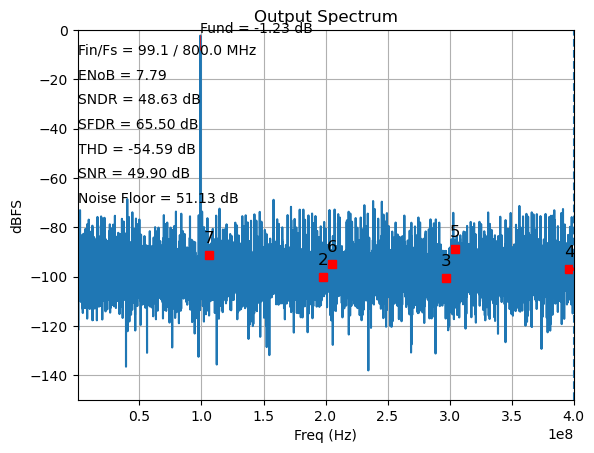

In [12]:
display_dataframe(cfg_info,pr["conf_name"])
# Generate the input signal
v_in_peak = [pr["v_in_peak"], 0]
v_in_p, v_in_n = signal_source(pr, mdl, v_in_peak)

# Convertion begins
da = RISCA_core(mdl, pr, v_in_p, v_in_n)
# Analyse the result
test = Analyser(da, pr)
test.mode_analyser()